In [1]:
# Obviously, import needed packages
import urllib.request # module for downloading data from URLs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time to pratice some basics in Pandas using cute data about penguins :)
#### (1) Your data file is of penguins and their characteristics
- More information on the data (and cute penguin illustrations!): https://github.com/allisonhorst/palmerpenguins/blob/master/README.md

#### (2) Read in 'penguins_size.csv' using Pandas 

In [2]:
df = pd.read_csv('penguins_size.csv')
df


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


#### (3) Print the first four and last four rows of this file (separately) using a specific method you learned in your lessons, to get a feel for your dataset.

In [3]:
print(df.head(4)) # First 4 rows

print(df.tail(4)) # Last 4 rows

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
    species island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
148  Adelie  Dream              36.0             17.8              195.0   
149  Adelie  Dream              37.8             18.1              193.0   
150  Adelie  Dream              36.0             17.1              187.0   
151  Adelie  Dream              41.5             18.5              201.0   

     body_mass_g     sex  
148       3450.0  FEMALE  
149       3750.0    MALE  
150       3700.0  FEMA

#### (4) In one line of code, access only the species, body_mass_g, and sex columns and save to a new variable. Print out this new variable!
- there is more than one way to do this
- feel free to show multiple ways if you'd like

In [4]:
df2 = df[['species','body_mass_g','sex']]
print(df2)

    species  body_mass_g     sex
0    Adelie       3750.0    MALE
1    Adelie       3800.0  FEMALE
2    Adelie       3250.0  FEMALE
3    Adelie          NaN     NaN
4    Adelie       3450.0  FEMALE
..      ...          ...     ...
147  Adelie       3475.0  FEMALE
148  Adelie       3450.0  FEMALE
149  Adelie       3750.0    MALE
150  Adelie       3700.0  FEMALE
151  Adelie       4000.0    MALE

[152 rows x 3 columns]


#### (5)  Using the dataframe that you read into in (2):  Culmen length and depth are unfamiliar animal characteristics to many of us.  Rename culmen_length_mm to beak_length_mm, and culmen_depth_mm to beak_depth_mm.
- You MUST ensure that after running this cell you've 'updated' your dataframe in a way that SAVES those updates and uses this updated version moving forward.  You can do this via either:
  - forcing an update to the current dataframe using the inplace=True argument when you call your function (PREFERRED) - modifies the dataframe 'in place'
  - overwriting your dataframe....i.e., if your dataframe's name is 'data'
     - data = data.nameoffunctionthat willrenamecolumns(necessary arguments to function) - this ovewrites your current data dataframe

In [5]:
df = df.rename(
    columns={
        'culmen_length_mm': 'beak_length_mm',
        'culmen_depth_mm': 'beak_depth_mm'
    }
)

df

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


#### (6) Count the # of NaNs in each column.  Which column has the most?

In [6]:
print(df.isna().sum())

# The 'sex' column has the most, with 6. 

species              0
island               0
beak_length_mm       1
beak_depth_mm        1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64


#### (7) Drop any rows that have at least one NaN, and then confirm that you have removed all NaNs

In [7]:
df = df.dropna()

print(df.isna().sum())

species              0
island               0
beak_length_mm       0
beak_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


#### (8) For each numerical column, which you can think of as variables, each a characteristic of penguin, what is the maximum value? The minimum value?


In [9]:
# Beak length
print('Beak length\nMax:', df['beak_length_mm'].max(),
      '\nMin:', df['beak_length_mm'].min())
# Beak depth
print('\nBeak depth\nMax:', df['beak_depth_mm'].max(),
      '\nMin:', df['beak_depth_mm'].min())
# Flipper length
print('\nFlipper length\nMax:', df['flipper_length_mm'].max(),
      '\nMin:', df['flipper_length_mm'].min())
# Body mass
print('\nBody Mass\nMax:', df['body_mass_g'].max(),
      '\nMin:', df['body_mass_g'].min())

Beak length
Max: 46.0 
Min: 32.1

Beak depth
Max: 21.5 
Min: 15.5

Flipper length
Max: 210.0 
Min: 172.0

Body Mass
Max: 4775.0 
Min: 2850.0


#### (9) Create a box-and-whisker plot (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), using Pandas built-in plotting functionality, of a penguin characteristic of your choice.  

<Axes: title={'center': 'beak_length_mm'}, xlabel='island'>

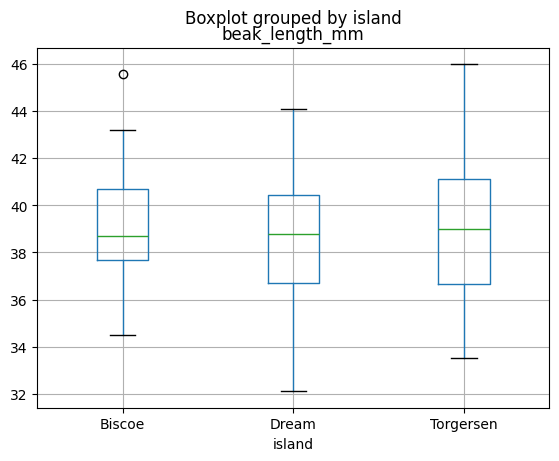

In [10]:
df.boxplot(column='beak_length_mm', by='island')

#### (10)  Describe the distribution of this characteristic, based on the box-and-whisker plot you created

I chose to look at the beak length grouped by island, and the data appears to be normally distributed on each of the 3 islands included in the dataset, as you can tell be the relative symmetry of the distribution. Although, there is a little skewness that comes with each island, for example, Biscoe has a more positive skewness, as you can see with the median value in the lower half of the IQR box. 